In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import scipy as sc
import numpy as np
import matplotlib.ticker as mticker

<h2> Import data (Make sure to parse dates.Consider setting index column to 'date'.) </h2>

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates= ['date'])
df = df.set_index(['date'])
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


<h2> Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset. </h2>

In [3]:
bottom = int(df.quantile(q=.025))
top = int(df.quantile(q=.975))
top, bottom

(177613, 17876)

In [4]:
top_data = df[df['value'] >= top]
bottom_data = df[df['value'] <= bottom]
len(top_data), len(bottom_data)

(33, 33)

In [5]:
cleaned_data = df[(df['value'] < top) & (df['value'] > bottom)]
cleaned_data

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


(<AxesSubplot:xlabel='date'>,
 <AxesSubplot:xlabel='date'>,
 <AxesSubplot:xlabel='date'>)

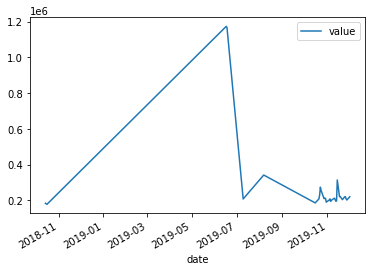

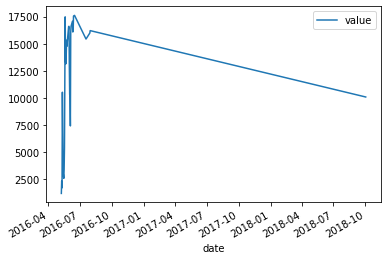

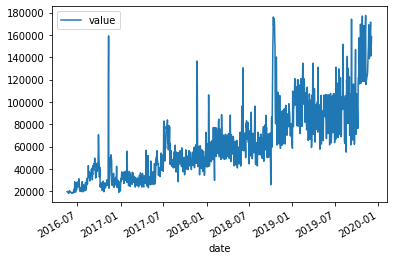

In [6]:
top_data.plot(), bottom_data.plot(), cleaned_data.plot()

<h2> Create a `draw_line_plot` function that uses Matplotlib to draw a line chart </h2>
<h2> The title should be "Daily freeCodeCamp Forum Page
 Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views". </h2>

In [7]:
x = cleaned_data.index
y = cleaned_data['value']
def draw_line_plot():
    fig, ax = plt.subplots(figsize = (15,5))
    ax.plot(x,y,color='r',linewidth = 1.5)
    ax.set(title = "Daily freeCodeCamp Forum Page Views 5/2016-12/2019", xlabel = "Date", ylabel = "Page Views")
    fig.savefig('line_plot.png')
    return fig

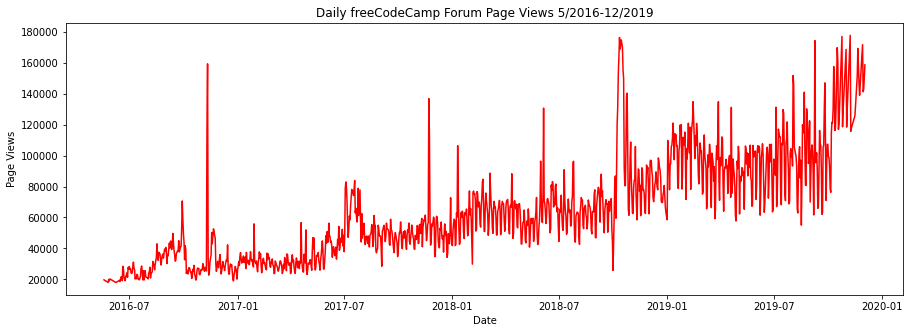

In [8]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(x,y, color = 'red', linewidth = 1.5)
ax.set(title = "Daily freeCodeCamp Forum Page Views 5/2016-12/2019", xlabel = "Date", ylabel = "Page Views")
fig.savefig('line_plot.png')

<h2> Create a `draw_bar_plot` function that draws a bar chart </h2>
<h2> It should show average daily page views for each month grouped by year. </h2>
<h2> The legend should show month labels and have a title of "Months". </h2>
<h2>  On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".</h2>

In [9]:
data_2016_to_2019 = df.groupby([df.index.strftime('%Y-%m')])['value'].mean().reset_index(name = 'Average Page Views')
data_2016_to_2019_month = []
data_2016_to_2019_views =  []
for i in data_2016_to_2019['date']:
    data_2016_to_2019_month.append(i)
for j in data_2016_to_2019['Average Page Views']:
    data_2016_to_2019_views.append(j)

data_2016_to_2019_dict = dict(zip(data_2016_to_2019_month,data_2016_to_2019_views))

data_2016_list = []
for i in range (0,4):
    data_2016_list.append(0)
data_2017_list = []
data_2018_list = []
data_2019_list = []
for i in data_2016_to_2019['date']:
    if '2016' in i:
        data_2016_list.append(i)
for i in data_2016_to_2019['date']:
    if '2017' in i:
        data_2017_list.append(i)
for i in data_2016_to_2019['date']:
    if '2018' in i:
        data_2018_list.append(i)
for i in data_2016_to_2019['date']:
    if '2019' in i:
        data_2019_list.append(i)
data_2016_list, data_2017_list, data_2018_list, data_2019_list

([0,
  0,
  0,
  0,
  '2016-05',
  '2016-06',
  '2016-07',
  '2016-08',
  '2016-09',
  '2016-10',
  '2016-11',
  '2016-12'],
 ['2017-01',
  '2017-02',
  '2017-03',
  '2017-04',
  '2017-05',
  '2017-06',
  '2017-07',
  '2017-08',
  '2017-09',
  '2017-10',
  '2017-11',
  '2017-12'],
 ['2018-01',
  '2018-02',
  '2018-03',
  '2018-04',
  '2018-05',
  '2018-06',
  '2018-07',
  '2018-08',
  '2018-09',
  '2018-10',
  '2018-11',
  '2018-12'],
 ['2019-01',
  '2019-02',
  '2019-03',
  '2019-04',
  '2019-05',
  '2019-06',
  '2019-07',
  '2019-08',
  '2019-09',
  '2019-10',
  '2019-11',
  '2019-12'])

In [10]:
data_2016_views_list = []
for i in range(0,4):
    data_2016_views_list.append(0)
data_2017_views_list = []
data_2018_views_list = []
data_2019_views_list = []
for i in data_2016_to_2019_dict.keys():
    if '2016' in i:
        data_2016_views_list.append(data_2016_to_2019_dict.get(i))
    elif '2017' in i:
        data_2017_views_list.append(data_2016_to_2019_dict.get(i))
    elif '2018' in i:
        data_2018_views_list.append(data_2016_to_2019_dict.get(i))
    elif '2019' in i:
        data_2019_views_list.append(data_2016_to_2019_dict.get(i))
data_2016_views_list, data_2017_views_list, data_2018_views_list, data_2019_views_list

([0,
  0,
  0,
  0,
  11242.695652173914,
  19124.366666666665,
  23314.225806451614,
  31049.1935483871,
  41476.86666666667,
  27398.322580645163,
  40448.63333333333,
  27832.41935483871],
 [32785.16129032258,
  31113.071428571428,
  29369.09677419355,
  30878.733333333334,
  34244.290322580644,
  43577.5,
  65806.83870967742,
  47712.45161290323,
  47376.8,
  47438.709677419356,
  57701.566666666666,
  48420.58064516129],
 [58580.096774193546,
  65679.0,
  62693.77419354839,
  62350.833333333336,
  56562.87096774193,
  70117.0,
  63591.06451612903,
  62831.6129032258,
  65941.73333333334,
  112592.0,
  78688.33333333333,
  80047.48387096774],
 [102056.51612903226,
  105968.35714285714,
  91214.48387096774,
  89368.43333333333,
  91439.90322580645,
  162402.6,
  100804.45161290323,
  117991.03225806452,
  97268.83333333333,
  150862.70967741936,
  181026.7,
  173870.33333333334])

In [11]:
year = ['2017','2018','2019']
views = [data_2017_views_list,data_2018_views_list,data_2019_views_list]
dict_views_2017_to_2019 = dict(zip(year,views))
df_views_2017_to_2019 = pd.DataFrame(dict_views_2017_to_2019)
df_views_2016 = pd.DataFrame({'2016' : data_2016_views_list})
df_views_new = pd.concat([df_views_2016,df_views_2017_to_2019], axis = 1)
df_views_new['2016'] = df_views_new['2016'].fillna(0) 
df_views_new['months'] = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_views_final = df_views_new.set_index('months')
df_views_final.T

months,January,February,March,April,May,June,July,August,September,October,November,December
2016,0.000000,0.000000,0.000000,0.000000,11242.695652,19124.366667,23314.225806,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,112592.000000,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,162402.600000,100804.451613,117991.032258,97268.833333,150862.709677,181026.700000,173870.333333


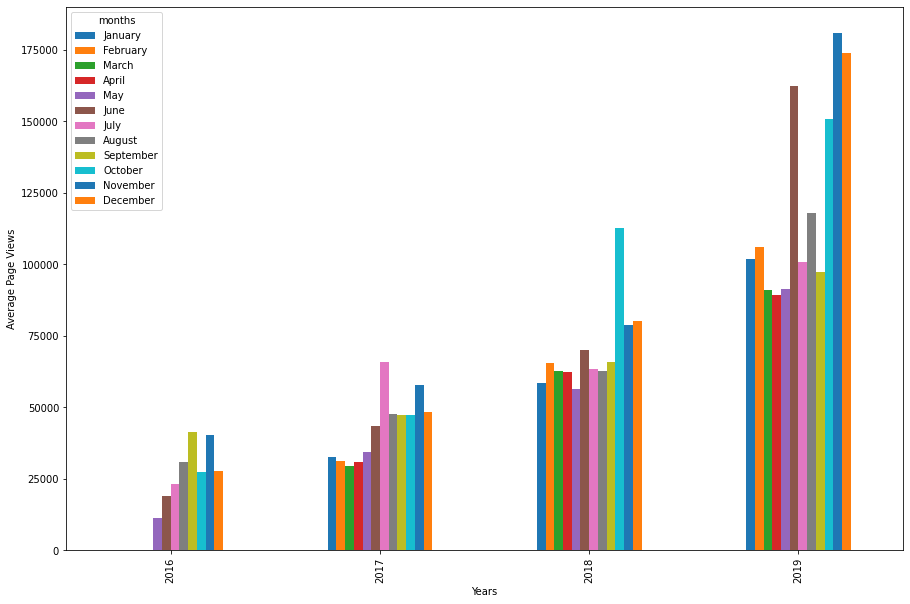

In [12]:
df_views_final.T.plot.bar(figsize = (15,10), xlabel = "Years", ylabel = "Average Page Views")
plt.show()


In [13]:
def draw_bar_plot():
    df_bar = df_views_final.T
    df_bar.plot.bar(figsize = (15,10), xlabel = "Years", ylabel = "Average Page Views")
    fig.savefig('bar_plot.png')
    return fig

<h2> Create a `draw_box_plot` function that uses Searborn to draw two adjacent box plots </h2>
<h2> These box plots should show how the values are distributed within a given year or month and how it compares over time.</h2>
<h2> The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)".</h2>
<h2> Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.</h2>
<h2>For each chart, make sure to use a copy of the data frame.</h2>

In [14]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-09,1201,2016,May
1,2016-05-10,2329,2016,May
2,2016-05-11,1716,2016,May
3,2016-05-12,10539,2016,May
4,2016-05-13,6933,2016,May
...,...,...,...,...
1299,2019-11-29,171584,2019,Nov
1300,2019-11-30,141161,2019,Nov
1301,2019-12-01,142918,2019,Dec
1302,2019-12-02,220144,2019,Dec


[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Page Views'),
 Text(0.5, 1.0, 'Year-wise Box Plot (Trend)')]

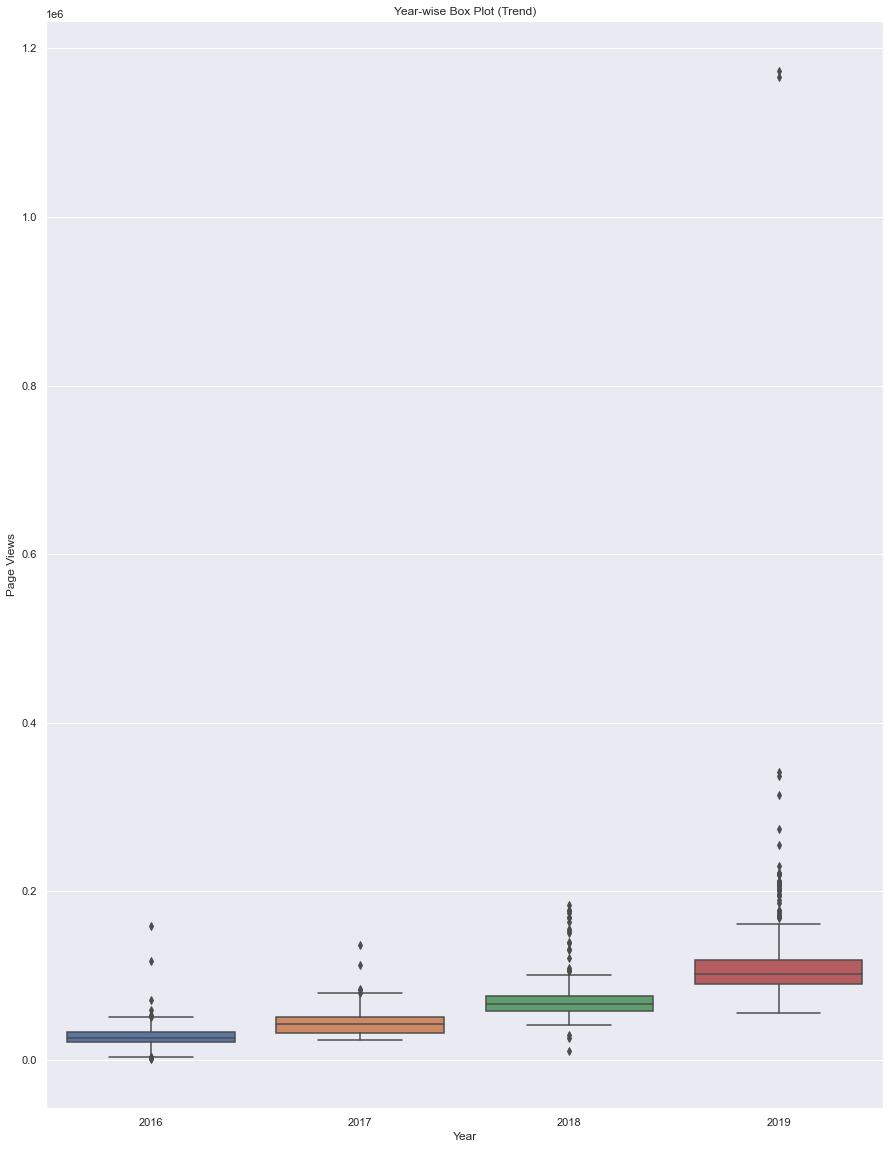

In [15]:
sns.set(rc={"figure.figsize":(15,20)})
sns.boxplot(x=df_box['year'], y = df_box['value']).set(xlabel = "Year", ylabel = "Page Views", title = "Year-wise Box Plot (Trend)")

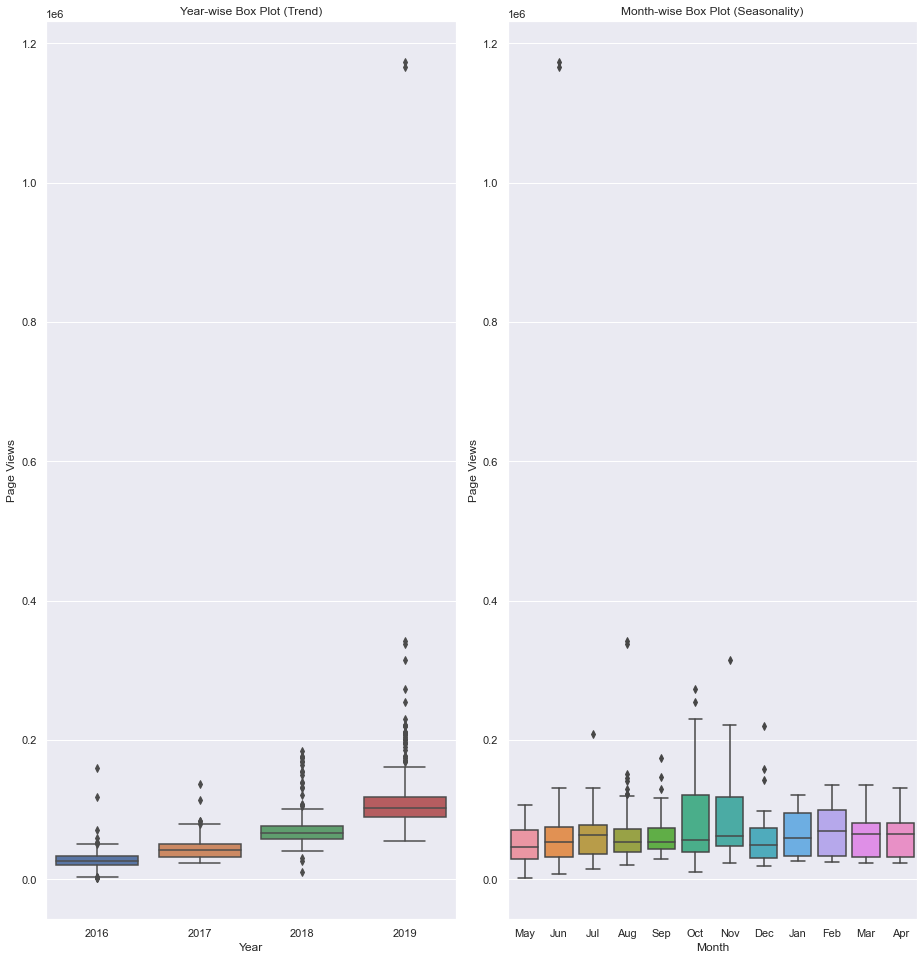

In [16]:
plt.rcParams["figure.figsize"] = [13, 13.50]
plt.rcParams["figure.autolayout"] = True
fig, axes = plt.subplots(1, 2)

sns.boxplot(data = df_box, x = 'year', y = 'value', ax=axes[0])
axes[0].set(title = "Year-wise Box Plot (Trend)", ylabel = "Page Views", xlabel="Year")
sns.boxplot(data = df_box, x = df_box['month'], y = 'value', ax=axes[1])
axes[1].set(title = "Month-wise Box Plot (Seasonality)", ylabel = "Page Views", xlabel="Month")
plt.show()

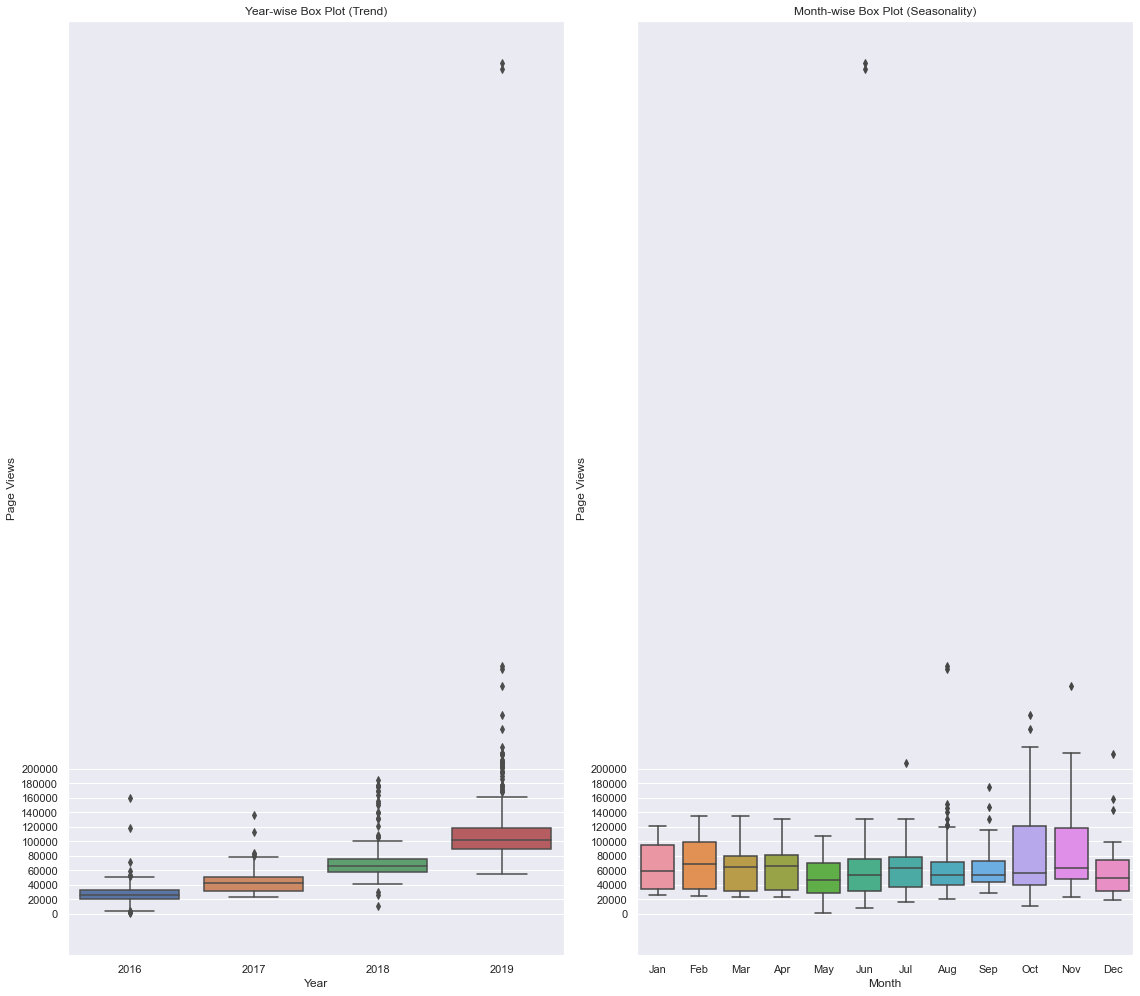

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 14))
sns.boxplot(ax=ax1, data=df_box, x=df_box["year"], y=df_box["value"])
ax1.set(xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)")
sns.boxplot(ax=ax2,data=df_box,x=df_box["month"],y=df_box["value"],order=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
ax2.set_title("Month-wise Box Plot (Seasonality)")
ax2.set_xlabel("Month")
ax2.set_ylabel("Page Views")
y_ticks = ["0","20000","40000","60000","80000","100000","120000","140000","160000","180000","200000"]
ax1.yaxis.set_major_locator(mticker.FixedLocator([int(s) for s in y_ticks]))
ax1.set_yticklabels(y_ticks)
ax2.yaxis.set_major_locator(mticker.FixedLocator([int(s) for s in y_ticks]))
ax2.set_yticklabels(y_ticks)
fig.savefig('box_plot.png')

In [18]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 14))
    sns.boxplot(ax=ax1, data=df_box, x=df_box["year"], y=df_box["value"])
    ax1.set(xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)")
    sns.boxplot(ax=ax2,data=df_box,x=df_box["month"],y=df_box["value"],order=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
    ax2.set_title("Month-wise Box Plot (Seasonality)")
    ax2.set_xlabel("Month")
    ax2.set_ylabel("Page Views")
    y_ticks = ["0","20000","40000","60000","80000","100000","120000","140000","160000","180000","200000"]
    ax1.yaxis.set_major_locator(mticker.FixedLocator([int(s) for s in y_ticks]))
    ax1.set_yticklabels(y_ticks)
    ax2.yaxis.set_major_locator(mticker.FixedLocator([int(s) for s in y_ticks]))
    ax2.set_yticklabels(y_ticks)
    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig